In [1]:
# Import basic libraries
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('default')
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# Define path to PyTools classes
import sys
sys.path.insert(0, '../src')

# Import PyTools classes
from KineticMechanism import KineticMechanism
from OpenSMOKEppXMLFile import OpenSMOKEppXMLFile
from LaminarFlame1D import LaminarFlame1D
from PolimiSootModule import *
from Utilities import *

In [2]:
# Output folder
plot_folder = 'Plots\\'

In [3]:
# Table size
npts_Z = 2001
npts_y = 2001

In [4]:
# Write table on file
write_xml = 1

In [5]:
# Post-process CFD flames
post_process_cfd = 0

In [6]:
# Path to kinetic mechanism
kin_xml_file_name="C:\\Users\\acuoci\\Aachen-Data\\Kinetics\\CRECK_2012\\kinetics\\kinetics.xml"
kin_xml_file_name="C:\\Users\\acuoci\\Aachen-Data\\Kinetics\\GRI30\\kinetics-GRI30-nonox\\kinetics.xml"
kin_xml_file_name="C:\\Users\\acuoci\\Aachen-Data\\Kinetics\POLIMI_1509\\POLIMI_SOOT_1509\\kinetics-POLIMI_SOOT_1509.BIN4.reordered.compact\\kinetics.xml"

kinetics = KineticMechanism(kin_xml_file_name)

In [7]:
# Define groups of species
kinetics.AddGroupOfSpecies('PAH12', 'PAHs with 1/2 aromatic rings', DefaultPAH12())
kinetics.AddGroupOfSpecies('PAH34', 'PAHs with 3/4 aromatic rings', DefaultPAH34())
kinetics.AddGroupOfSpecies('PAHLP', 'PAHs with more than 4 aromatic rings (molecular and radical)', DefaultPAHLP(kinetics.species))
kinetics.AddGroupOfSpecies('PAHLP-M', 'PAHs with more than 4 aromatic rings (molecular)', DefaultPAHLPM(kinetics.species))
kinetics.AddGroupOfSpecies('PAHLP-R', 'PAHs with more than 4 aromatic rings (radical)', DefaultPAHLPR(kinetics.species))
kinetics.AddGroupOfSpecies('SP', 'BIN sections corresponding to spherical particles (molecular and radical)', DefaultSP(kinetics.species))
kinetics.AddGroupOfSpecies('SP-M', 'BIN sections corresponding to spherical particles (molecular)', DefaultSPM(kinetics.species))
kinetics.AddGroupOfSpecies('SP-R', 'BIN sections corresponding to spherical particles (radical)', DefaultSPR(kinetics.species))
kinetics.AddGroupOfSpecies('AGG', 'BIN sections corresponding to aggregates (molecular and radical)', DefaultAGG(kinetics.species))
kinetics.AddGroupOfSpecies('AGG-M', 'BIN sections corresponding to aggregates (molecular)', DefaultAGGM(kinetics.species))
kinetics.AddGroupOfSpecies('AGG-R', 'BIN sections corresponding to aggregates (radical)', DefaultAGGR(kinetics.species))

In [8]:
# Progress variable definition
alpha = [ ['H2O', 1.],
          ['CO2', 1.],
          ['H2', 0.6],
          ['CO', 1.],
          ['O2', 0.],
          ['PAH12', 80.],
          ['PAH34', 160.],
          ['PAHLP', 320.],
        ]

In [9]:
# Path to data
folder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\Flamelets\\F3-Aachen\\ethylene\\GRI30\\Output-Le1\\"
folder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\Flamelets\\F3-Aachen\\ethylene\\POLIMI_1509\\POLIMI_SOOT_1509_BIN4\\Output-Le1\\"

# Steady-state solutions
list_steady = [];
list_steady.append('0.02')
list_steady.append('0.05')
list_steady.append('0.1')
list_steady.append('0.2')
list_steady.append('0.5')
list_steady.append('1')
list_steady.append('2')
list_steady.append('5')
list_steady.append('10')
list_steady.append('20')
list_steady.append('50')
list_steady.append('100')
list_steady.append('150')
list_steady.append('175')
list_steady.append('200')
nflames_steady = len(list_steady)

# Extinction solutions
list_extinctions = [];
list_extinctions.append('1850')
list_extinctions.append('1800')
list_extinctions.append('1750')
list_extinctions.append('1700')
list_extinctions.append('1600')
list_extinctions.append('1400')
list_extinctions.append('1200')
list_extinctions.append('1000')
list_extinctions.append('800')
list_extinctions.append('600')
list_extinctions.append('400')
nflames_dynamics = len(list_extinctions)

# Final cold solution
sol_xml_file_name = folder_name + "Output_Cold_0_kJkg.xml"

In [10]:
# Collecting steady-state flames
flames = []
for i in range(nflames_steady):
    sol_xml_file_name = folder_name + "Output_" + list_steady[i] + "_Hz_0_kJkg.xml"
    flames.append( LaminarFlame1D(sol_xml_file_name, kinetics) )

# Collecting dynamic flames
for i in range(nflames_dynamics):
    sol_xml_file_name = folder_name + "Dynamics_" + list_extinctions[i] + "_K.xml"
    flames.append( LaminarFlame1D(sol_xml_file_name, kinetics) )

# Cold flame
flames.append( LaminarFlame1D(sol_xml_file_name, kinetics) )

# Total number of flames
nflames = len(flames)

no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in t

In [11]:
for i in range(nflames):
    LaminarFlame1D.progress_variable(flames[i], kinetics, alpha)

In [12]:
# Create plot folder (if it does not exist)
from pathlib import Path
Path(plot_folder).mkdir(parents=True, exist_ok=True)

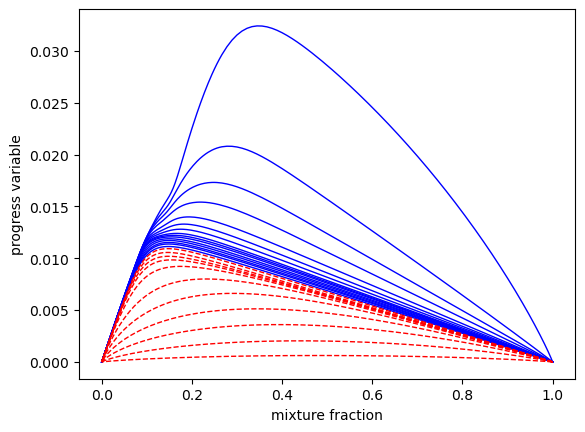

In [13]:
# Plot the progress variable curves as a function of the mixture fraction
for i in range(nflames_steady):
    plt.plot(flames[i].Z,flames[i].y, linestyle='-', linewidth=1, color='blue')
for i in range(nflames_dynamics):
    plt.plot(flames[nflames_steady+i].Z,flames[nflames_steady+i].y, linestyle='--', linewidth=1, color='red')
plt.xlabel("mixture fraction")
plt.ylabel("progress variable")
plt.savefig(plot_folder +'flamelets_Y')

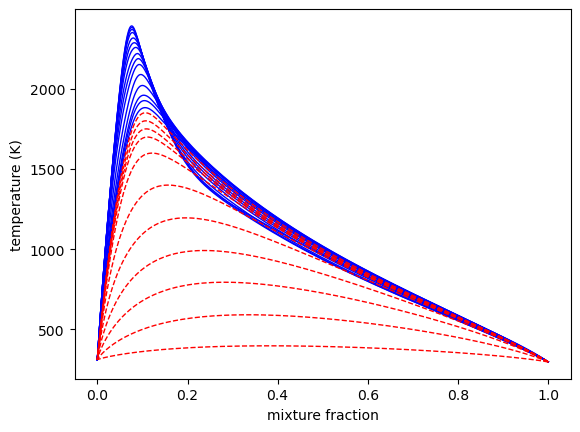

In [14]:
# Plot the temperature curves as a function of the mixture fraction
for i in range(nflames_steady):
    plt.plot(flames[i].Z,flames[i].T, linestyle='-', linewidth=1, color='blue')
for i in range(nflames_dynamics):
    plt.plot(flames[nflames_steady+i].Z,flames[nflames_steady+i].T, linestyle='--', linewidth=1, color='red')
plt.xlabel("mixture fraction")
plt.ylabel("temperature (K)")
plt.savefig(plot_folder +'flamelets_T')

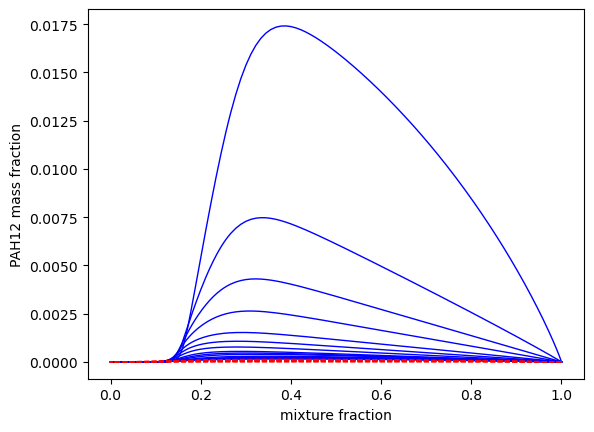

In [15]:
# Plot the PAH12 curves as a function of the mixture fraction
for i in range(nflames_steady):
    plt.plot(flames[i].Z,flames[i].pah12_Y, linestyle='-', linewidth=1, color='blue')
for i in range(nflames_dynamics):
    plt.plot(flames[nflames_steady+i].Z,flames[nflames_steady+i].pah12_Y, linestyle='--', linewidth=1, color='red')
plt.xlabel("mixture fraction")
plt.ylabel("PAH12 mass fraction")
plt.savefig(plot_folder +'flamelets_PAH12')

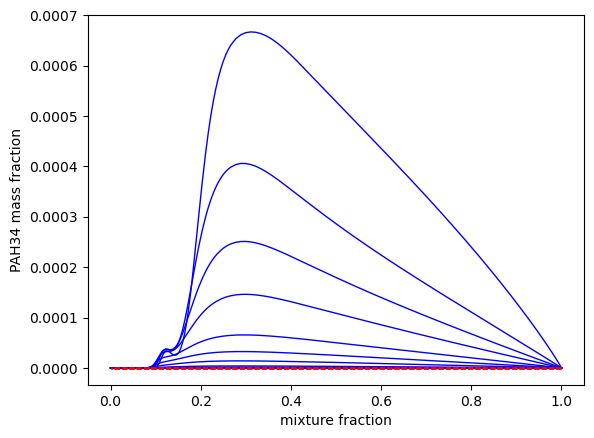

In [16]:
# Plot the PAH34 curves as a function of the mixture fraction
for i in range(nflames_steady):
    plt.plot(flames[i].Z,flames[i].pah34_Y, linestyle='-', linewidth=1, color='blue')
for i in range(nflames_dynamics):
    plt.plot(flames[nflames_steady+i].Z,flames[nflames_steady+i].pah34_Y, linestyle='--', linewidth=1, color='red')
plt.xlabel("mixture fraction")
plt.ylabel("PAH34 mass fraction")
plt.savefig(plot_folder +'flamelets_PAH34')

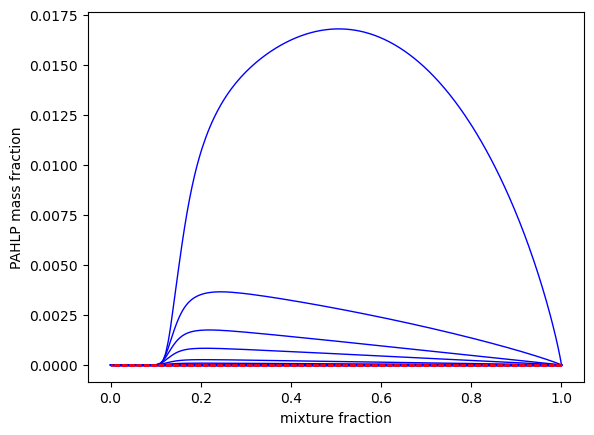

In [17]:
# Plot the PAHLP curves as a function of the mixture fraction
for i in range(nflames_steady):
    plt.plot(flames[i].Z,flames[i].pahlp_Y, linestyle='-', linewidth=1, color='blue')
for i in range(nflames_dynamics):
    plt.plot(flames[nflames_steady+i].Z,flames[nflames_steady+i].pahlp_Y, linestyle='--', linewidth=1, color='red')
#plt.yscale('log')
plt.xlabel("mixture fraction")
plt.ylabel("PAHLP mass fraction")
plt.savefig(plot_folder +'flamelets_PAHLP')

(0.0, 7.5e-06)

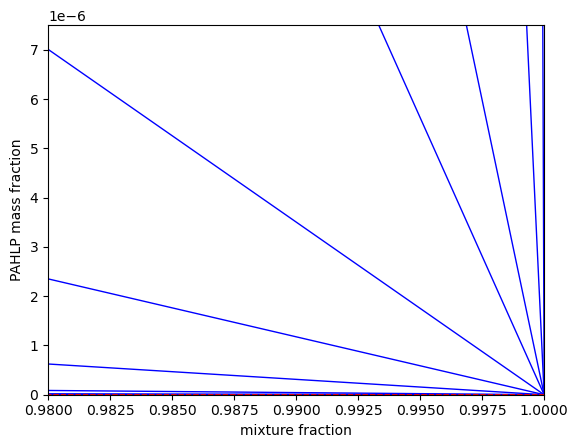

In [18]:
# Plot the PAHLP curves as a function of the mixture fraction: zoom on the fuel side
for i in range(nflames_steady):
    plt.plot(flames[i].Z,flames[i].pahlp_Y, linestyle='-', linewidth=1, color='blue')
for i in range(nflames_dynamics):
    plt.plot(flames[nflames_steady+i].Z,flames[nflames_steady+i].pahlp_Y, linestyle='--', linewidth=1, color='red')
#plt.yscale('log')
plt.xlabel("mixture fraction")
plt.ylabel("PAHLP mass fraction")
plt.xlim([0.98,1])
plt.ylim([0, 0.75e-5])

In [19]:
import numpy as np

minmax_y = []
for i in range(nflames):
    minmax_y.append(flames[i].minmax_progress_variable())
    
min_y = min(np.array(minmax_y)[:,0])
max_y = max(np.array(minmax_y)[:,1])

for i in range(nflames):
    flames[i].create_grid(kinetics, [npts_Z, npts_y], [0.,min_y], [1.,max_y] )

In [20]:
# Check for monotonicity
threshold = 1e-12
nviolations = []
for k in range(npts_Z):
    y_values = []
    for i in range(nflames):
        y_values.append( flames[i].y_int_Z[k] )
    
    # Number of violations
    n = 0
    for i in range(nflames-1):
        if ( (y_values[i+1] -y_values[i]) > threshold ) : n = n+1
    nviolations.append(n)
    #if (n > 0): print(flames[0].Z_grid[k], n)

np.sum(nviolations)

3

In [21]:
from scipy import interpolate
from time import process_time

class TableNormalized:
    
    def __init__(self, flames, label):
    
        # Start time
        tstart = process_time() 

        nflames = len(flames)

        # Un-normalized grids
        Z_grid_abs = np.copy(flames[0].Z_grid)
        C_grid_abs = np.copy(flames[0].y_grid)

        # Grid points
        npts_Z = len(Z_grid_abs)
        npts_C = len(C_grid_abs) 

        # Normalized grids
        Ztilde_grid = []
        for i in range(npts_Z):
            Ztilde_grid.append( 0. + (1.-0.)/(npts_Z-1)*i )

        Ctilde_grid = []
        for i in range(npts_C):
            Ctilde_grid.append( 0. + (1.-0.)/(npts_C-1)*i )

        # Table
        table = np.empty((npts_Z, npts_C))
        table.fill(np.nan)

        # Maximum and minimum progress variable
        Cmax = []
        Cmin = []
        for k in range(npts_Z):
            dummy = []
            for i in range(len(flames)):
                dummy.append(flames[i].y_int_Z[k])   
            Cmax.append(np.max(dummy))
            Cmin.append(np.min(dummy))

        # Loop over all the mixture fraction points
        for k in range(npts_Z):
            
            border = 0
            
            if (Cmax[k]-Cmin[k] < 0.):
                if ( abs(Cmax[k]-Cmin[k]) > 1.e-12):
                    print("WARNING: monotonicity condition is not verified in Z=", Z_grid_abs[k], "Cmin=", Cmin[k], "Cmax=",Cmax[k])
                
            if (Cmax[k]-Cmin[k] <= 0.):
                border = 1
                #print("Border point: ", Z_grid_abs[k])

            
            # Basic grid (also for boundaries)
            Ctilde_grid_local = np.empty(nflames)
            for i in range(nflames):
                Ctilde_grid_local[i] = 0. + (1.-0.)/(nflames-1)*i
            
            # Internal points
            if (border == 0):
                for i in range(nflames):
                    Ctilde = 0.
                    if (Cmax[k]-Cmin[k] > 0.):
                        Ctilde = (flames[i].y_int_Z[k]-Cmin[k])/(Cmax[k]-Cmin[k])
                    if (Ctilde<0.): Ctilde = 0.
                    elif (Ctilde>1.): Ctilde = 1.
                    Ctilde_grid_local[i] = Ctilde

            # Local profile
            local = np.empty(nflames)
            if (label == 'T'):
                for i in range(nflames):
                    local[i] = flames[i].T_int_Z[k]
            elif (label == 'Omegay'):
                for i in range(nflames):
                    local[i] = flames[i].Omegay_int_Z[k]
            elif (label == 'rho'):
                for i in range(nflames):
                    local[i] = flames[i].rho_int_Z[k]
            elif (label == 'PAH12'):
                for i in range(nflames):
                    local[i] = flames[i].pah12_int_Z[k]
            elif (label == 'PAH34'):
                for i in range(nflames):
                    local[i] = flames[i].pah34_int_Z[k]
            elif (label == 'PAHLP'):
                for i in range(nflames):
                    local[i] = flames[i].pahlp_int_Z[k]                
            else:
                index = kinetics.species.index(label)
                for i in range(nflames):
                    local[i] = flames[i].Y_int_Z[k,index]

            # Create interpolation objects
            f = interpolate.interp1d(Ctilde_grid_local, local)

            # Interpolations
            table[k,:] = f(Ctilde_grid)

        # Assign class values
        self.label = label
        self.table = table
        self.Cmin = Cmin
        self.Cmax = Cmax
        self.Ztilde_grid = Ztilde_grid
        self.Ctilde_grid = Ctilde_grid
        
        self.flame_eq = flames[0]
        self.flame_q = flames[nflames_steady]

        # Stop the stopwatch / counter
        tstop = process_time()

        print("CPU time (s): ", tstop-tstart)
        
    
    def BuildTableForGraphicalPurposes(self, flames):
    
        # Start time
        tstart = process_time() 

        nflames = len(flames)

        Z_grid_abs = np.copy(flames[0].Z_grid)
        C_grid_abs = np.copy(flames[0].y_grid)

        npts_Z = len(Z_grid_abs)
        npts_C = len(C_grid_abs) 

        tablegp = np.empty((npts_Z, npts_C))
        tablegp.fill(np.nan)


        # Loop over all the mixture fraction points
        for k in range(npts_Z):

            # Range of progress variable at the given mixture fraction
            C_grid_local = []
            for i in range(nflames):
                C_grid_local.append(flames[i].y_int_Z[k])
            min_C_local = C_grid_local[-1]
            max_C_local = C_grid_local[0]

            # Be sure that interpolation query is well defined

            j_min=0;
            for j in range(npts_C):
                if (C_grid_abs[j] >= min_C_local):
                    j_min = j;
                    break;

            j_max=0;
            for j in range(npts_C):
                if (C_grid_abs[j] > max_C_local):
                    j_max = j;
                    break;

            C_grid_corrected = np.copy(C_grid_abs[j_min:j_max])


            # Local profile
            local = np.empty(nflames)
            if (self.label == 'T'):
                for i in range(nflames):
                    local[i] = flames[i].T_int_Z[k]
            elif (self.label == 'Omegay'):
                for i in range(nflames):
                    local[i] = flames[i].Omegay_int_Z[k]
            elif (self.label == 'rho'):
                for i in range(nflames):
                    local[i] = flames[i].rho_int_Z[k]
            elif (self.label == 'PAH12'):
                for i in range(nflames):
                    local[i] = flames[i].pah12_int_Z[k]
            elif (self.label == 'PAH34'):
                for i in range(nflames):
                    local[i] = flames[i].pah34_int_Z[k]
            elif (self.label == 'PAHLP'):
                for i in range(nflames):
                    local[i] = flames[i].pahlp_int_Z[k]                
            else:
                index = kinetics.species.index(self.label)
                for i in range(nflames):
                    local[i] = flames[i].Y_int_Z[k,index]

            # Create interpolation objects
            f = interpolate.interp1d(C_grid_local, local)

            # Interpolations
            tablegp[k,j_min:j_max] = f(C_grid_corrected)


        # Stop the stopwatch / counter
        tstop = process_time()

        print("CPU time (s): ", tstop-tstart)

        self.tablegp = tablegp
        
    
    def PlotMap(self, title, filename):
    
        extent = np.min(self.flame_eq.Z_grid), np.max(self.flame_eq.Z_grid), np.min(self.flame_eq.y_grid), np.max(self.flame_eq.y_grid)
        c = plt.imshow(self.tablegp.transpose(), cmap='jet', aspect = 'auto', origin ='lower', extent=extent)
        plt.colorbar(c)
        plt.title(title, fontweight ="bold")
        plt.xlabel('mixture fraction Z [-]')
        plt.ylabel('progress variable C [-]')
        plt.plot(self.flame_eq.Z, self.flame_eq.y, color='black', linewidth=1)
        plt.plot(self.flame_q.Z, self.flame_q.y, color='black', linewidth=1, linestyle='--')
        plt.ylim([0, 1.05*np.max(flames[0].y_grid)])
        plt.savefig(plot_folder + filename)
        
        
    def PlotMapTilde(self, title, filename):
    
        extent = 0, 1, 0, 1
        c = plt.imshow(self.table.transpose(), cmap='jet', aspect = 'auto', origin ='lower', extent=extent)
        plt.colorbar(c)
        plt.title(title, fontweight ="bold")
        plt.xlabel('mixture fraction Z [-]')
        plt.ylabel('progress variable Ctilde [-]')
        plt.ylim([0, 1.05])
        plt.savefig(plot_folder + filename)
    
    
    def PrintLookupTable(self, name_extended):
    
        npts_Z = len(self.Ztilde_grid)
        npts_C = len(self.Ctilde_grid)
                
        print('Lookup table: ', self.label)
        f = open(plot_folder + "lookuptable." + self.label + ".xml", "w")
        f.write("<?xml version=\"1.0\" ?>\n")
        f.write("<opensmoke>\n")    

        f.write("<Table" + name_extended + ">\n")    
        for i in range(npts_C):
            for j in range(npts_Z):
                f.write( "{:e} ".format(self.table[j,i]) )
            f.write('\n')         
        f.write("</Table" + name_extended + ">\n") 

        f.write("</opensmoke>\n")
        f.close()
        
        
    def Reconstruct(self, Z, C):

        npts_Z = len(self.Ztilde_grid)
        npts_C = len(self.Ctilde_grid)

        dZ = (1.-0.)/(npts_Z-1)
        dC = (1.-0.)/(npts_C-1)
        
        fcmin = interpolate.interp1d(self.Ztilde_grid, self.Cmin)
        fcmax = interpolate.interp1d(self.Ztilde_grid, self.Cmax)

        recon = np.empty((len(Z),1))
        recon.fill(np.nan)

        for i in range(len(Z)):
            
            Cmin = fcmin( min( max(Z[i],0.), 1.) )
            Cmax = fcmax( max( min(Z[i],1.), 0.) )
            
            #if (Cmax-Cmin <= 0.):
            #    print("WARNING: Cmax-Cmin=0")
            
            if (Cmax-Cmin <= 0.):
            
                iz = max( min( math.floor((Z[i]-0.)/dZ), npts_Z-1), 0)
                recon[i] = self.table[iz,0]
            
            else:
                
                # Normal Ctilde
                Ctilde = (C[i]-Cmin)/(Cmax-Cmin)
                #if (Ctilde<0.): Ctilde = 0.
                #elif (Ctilde>1.): Ctilde = 1.

                iz = math.floor((Z[i]-0.)/dZ)
                ic = math.floor((Ctilde-0.)/dC)

                if ( (iz < npts_Z-1) and (ic < npts_C-1) ):

                    Q11 = self.table[iz,ic]
                    Q21 = self.table[iz+1,ic]
                    Q12 = self.table[iz,ic+1]
                    Q22 = self.table[iz+1,ic+1]

                    z1 = self.Ztilde_grid[iz]
                    z2 = self.Ztilde_grid[iz+1]
                    c1 = self.Ctilde_grid[ic]
                    c2 = self.Ctilde_grid[ic+1]

                    coeff  = 1./dZ/dC

                    f = coeff * ( (z2-Z[i]) * ( Q11*(c2-Ctilde) + Q12 *(Ctilde-c1) ) + (Z[i]-z1) * (Q21 * (c2-Ctilde) + Q22 * (Ctilde-c1) ) );
                    recon[i] = f
                
                elif ( (ic >= npts_C-1) and (iz < npts_Z-1) ):
                    
                    #print("WARNING (topC): ", "point: ", i, "Z=", Z[i], "C=", C[i], "Ctilde=", Ctilde, "iz=", iz)
                    
                    Q1 = self.table[iz,-1]
                    Q2 = self.table[iz+1,-1]
                    z1 = self.Ztilde_grid[iz]
                    
                    f = Q1 + (Q2-Q1)/dZ*(Z[i]-z1)
                    recon[i] = f
                    
                elif ( (ic < npts_C-1) and (iz >= npts_Z-1) ):
                    
                    #print("WARNING (topZ): ", "point: ", i, "Z=", Z[i], "C=", C[i], "Ctilde=", Ctilde, "iz=", iz)
                    
                    Q1 = self.table[-1,ic]
                    Q2 = self.table[-1,ic+1]
                    c1 = self.Ctilde_grid[ic]
                    
                    f = Q1 + (Q2-Q1)/dC*(Ctilde-c1)
                    recon[i] = f 
                    
                elif ( (ic >= npts_C-1) and (iz >= npts_Z-1) ):
                    
                    #print("WARNING (topZC): ", "point: ", i, "Z=", Z[i], "C=", C[i], "Ctilde=", Ctilde, "iz=", iz)
                    
                    recon[i] = self.table[-1,-1]                           
                
                else:
                    
                    nothing_to_do = 0.
                    #print("Unreconstructed point: ", i, "z=", Z[i], "C=", C[i], "Ctilde=", Ctilde, "iz=", iz, "ic=", ic)

        return recon        

In [22]:
tableNorm_T = TableNormalized(flames,'T')
tableNorm_Omegay = TableNormalized(flames,'Omegay')
tableNorm_CO2 = TableNormalized(flames,'CO2')
tableNorm_CO = TableNormalized(flames,'CO')
tableNorm_H2 = TableNormalized(flames,'H2')
tableNorm_H2O = TableNormalized(flames,'H2O')
tableNorm_C2H2 = TableNormalized(flames,'C2H2')
tableNorm_PAH12 = TableNormalized(flames,'PAH12')
tableNorm_PAH34 = TableNormalized(flames,'PAH34')
tableNorm_PAHLP = TableNormalized(flames,'PAHLP')

CPU time (s):  0.984375
CPU time (s):  1.046875
CPU time (s):  1.21875
CPU time (s):  1.015625
CPU time (s):  1.0625
CPU time (s):  1.03125
CPU time (s):  1.109375
CPU time (s):  1.125
CPU time (s):  1.09375
CPU time (s):  1.125


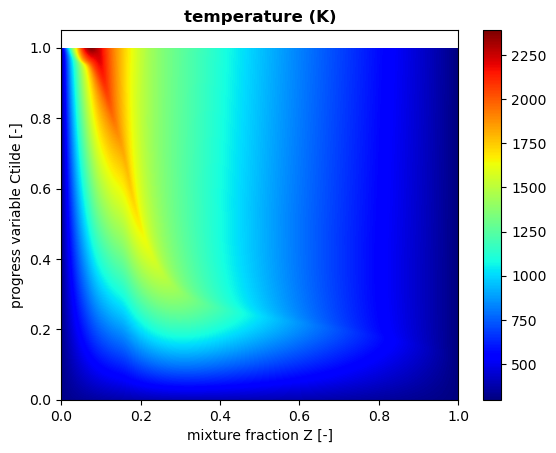

In [23]:
tableNorm_T.PlotMapTilde("temperature (K)", "Map2D_Temperature")

CPU time (s):  1.0625


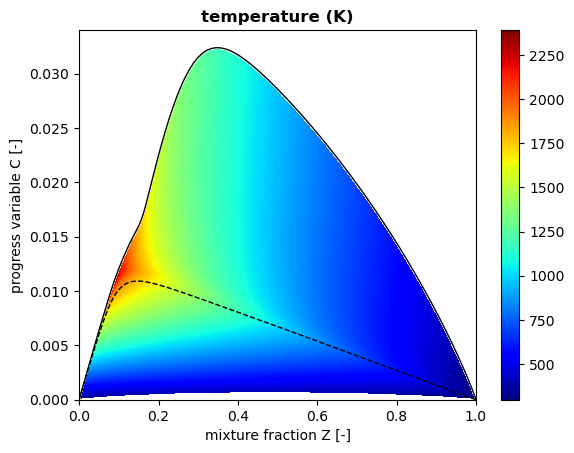

In [24]:
tableNorm_T.BuildTableForGraphicalPurposes(flames)
tableNorm_T.PlotMap("temperature (K)", "Map2D_Temperature")

CPU time (s):  1.03125


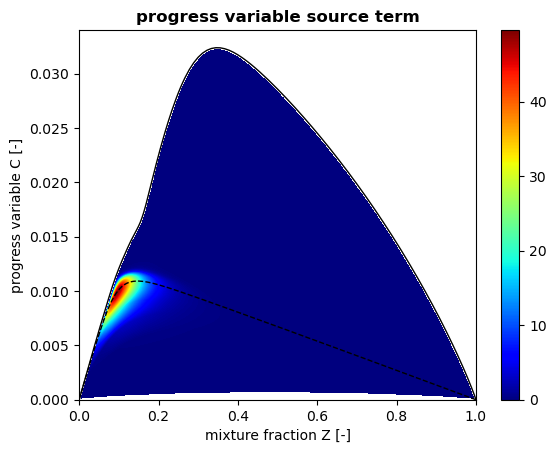

In [25]:
tableNorm_Omegay.BuildTableForGraphicalPurposes(flames)
tableNorm_Omegay.PlotMap("progress variable source term", "Map2D_Omegay")

CPU time (s):  1.515625


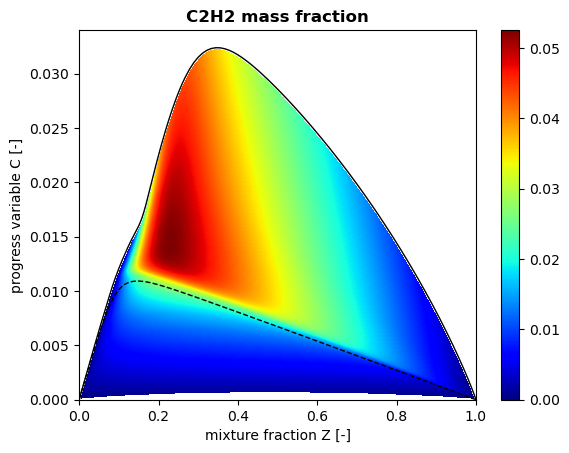

In [26]:
tableNorm_C2H2.BuildTableForGraphicalPurposes(flames)
tableNorm_C2H2.PlotMap("C2H2 mass fraction", "Map2D_C2H2")

CPU time (s):  0.953125


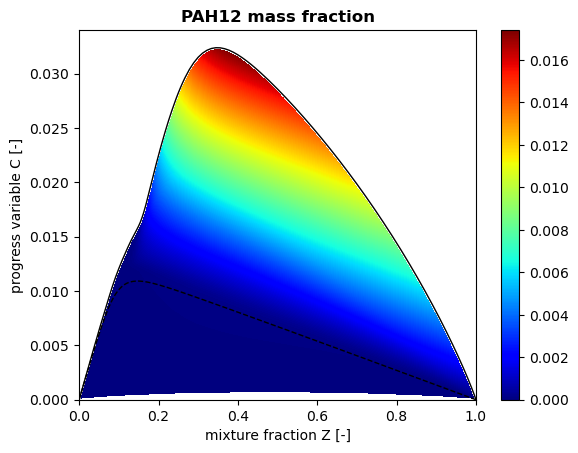

In [27]:
tableNorm_PAH12.BuildTableForGraphicalPurposes(flames)
tableNorm_PAH12.PlotMap("PAH12 mass fraction", "Map2D_PAH12")

CPU time (s):  1.015625


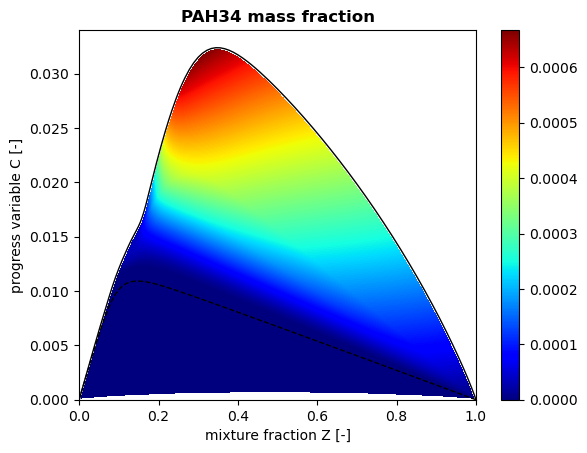

In [28]:
tableNorm_PAH34.BuildTableForGraphicalPurposes(flames)
tableNorm_PAH34.PlotMap("PAH34 mass fraction", "Map2D_PAH34")

CPU time (s):  1.015625


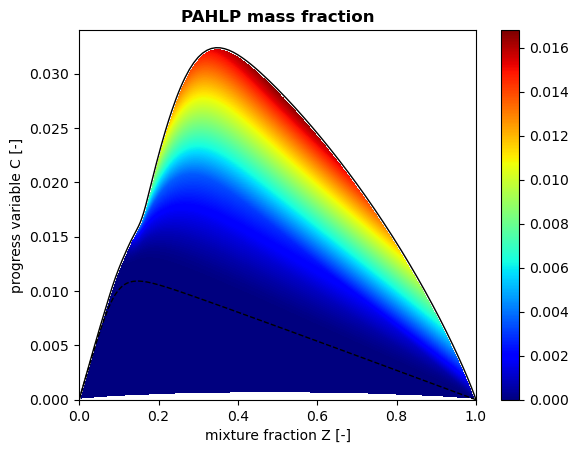

In [29]:
tableNorm_PAHLP.BuildTableForGraphicalPurposes(flames)
tableNorm_PAHLP.PlotMap("PAHLP mass fraction", "Map2D_PAHLP")

In [30]:
# Write lookup table
import xml.etree.ElementTree as ET

from xml.etree import ElementTree
from xml.dom import minidom

def prettify(elem):
    """Return a pretty-printed XML string for the Element.
    """
    rough_string = ElementTree.tostring(elem, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

def PrintMainLookupTable(kinetics, flames, alpha):
    
    # create the file structure
    opensmoke = ET.Element('opensmoke')
    comment = ET.Comment('Example of lookup table')
    opensmoke.append(comment)

    Y_definition = ET.SubElement(opensmoke, 'ProgressVariableDefinition')
    dummy = '\n'
    dummy = dummy + str(len(alpha)) + '\n'
    for i in range(len(alpha)):
        dummy = dummy + alpha[i][0] + ' ' + str(alpha[i][1]) + '\n'
    Y_definition.text = str(dummy)
    
    # Fuel composition
    YFuel = ET.SubElement(opensmoke, 'YFuel')
    dummy = '\n'
    count = 0
    for i in range(kinetics.ns):
        if (flames[0].Y[0,i] > 1.e-12):
            dummy = dummy + kinetics.species[i] + ' ' + str(flames[0].Y[0,i])
            dummy = dummy + '\n'
            count = count+1
    YFuel.text = '\n' + str(count) + dummy
    
    # Fuel composition
    YOx = ET.SubElement(opensmoke, 'YOx')
    dummy = '\n'
    count = 0
    for i in range(kinetics.ns):
        if (flames[0].Y[-1,i] > 1.e-12):
            dummy = dummy + kinetics.species[i] + ' ' + str(flames[0].Y[-1,i])
            dummy = dummy + '\n'
            count = count + 1
    YOx.text = '\n' + str(count) + dummy   
    
    npts_Z = len(flames[0].Z_grid)
    Z_points = ET.SubElement(opensmoke, 'Z-points')
    Z_points.text = str(npts_Z)

    npts_C = len(flames[0].y_grid)
    C_points = ET.SubElement(opensmoke, 'C-points')
    C_points.text = str(npts_C)

    Z_coordinates = ET.SubElement(opensmoke, 'Z-coordinates')
    dummy = ''
    for i in range(npts_Z):
        dummy = dummy + str(flames[0].Z_grid[i]) + ' '
    Z_coordinates.text = dummy

    C_coordinates = ET.SubElement(opensmoke, 'C-coordinates')
    dummy = ''
    for i in range(npts_C):
        dummy = dummy + str(flames[0].y_grid[i]) + ' '
    C_coordinates.text = dummy
    
    # Normalized progress variable
    Ctilde_grid = []
    for i in range(npts_C):
        Ctilde_grid.append( 0. + (1.-0.)/(npts_C-1)*i )

    # Maximum and minimum progress variable
    Cmax = []
    Cmin = []
    for k in range(npts_Z):
        dummy = []
        for i in range(len(flames)):
            dummy.append(flames[i].y_int_Z[k])   
        Cmax.append(np.max(dummy))
        Cmin.append(np.min(dummy))
    
    # Normalized progress variable
    Ctilde_coordinates = ET.SubElement(opensmoke, 'Ctilde-coordinates')
    dummy = ''
    for i in range(npts_C):
        dummy = dummy + str(Ctilde_grid[i]) + ' '
    Ctilde_coordinates.text = dummy    
    
    # Min progress variable
    Cmin_values = ET.SubElement(opensmoke, 'Cmin-values')
    dummy = ''
    for i in range(npts_C):
        dummy = dummy + str(Cmin[i]) + ' '
    Cmin_values.text = dummy     
    
    # Max progress variable
    Cmax_values = ET.SubElement(opensmoke, 'Cmax-values')
    dummy = ''
    for i in range(npts_C):
        dummy = dummy + str(Cmax[i]) + ' '
    Cmax_values.text = dummy      

    # create a new XML file with the results
    mylookuptable = prettify(opensmoke)
    lookuptable_file = open(plot_folder + "lookuptable.main.xml", "w")
    lookuptable_file.write(mylookuptable)

In [31]:
if write_xml == 1:
    PrintMainLookupTable(kinetics, flames, alpha)

In [32]:
if write_xml == 1:
    
    tableNorm_T.PrintLookupTable("T")
    tableNorm_Omegay.PrintLookupTable("Omegay")
    tableNorm_CO2.PrintLookupTable("CO2")
    tableNorm_CO.PrintLookupTable("CO")
    tableNorm_H2.PrintLookupTable("H2")
    tableNorm_H2O.PrintLookupTable("H2O")
    tableNorm_C2H2.PrintLookupTable("C2H2")
    tableNorm_PAH12.PrintLookupTable("PAH12")
    tableNorm_PAH34.PrintLookupTable("PAH34")
    tableNorm_PAHLP.PrintLookupTable("PAHLP")

Lookup table:  T
Lookup table:  Omegay
Lookup table:  CO2
Lookup table:  CO
Lookup table:  H2
Lookup table:  H2O
Lookup table:  C2H2
Lookup table:  PAH12
Lookup table:  PAH34
Lookup table:  PAHLP


In [33]:
folder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\CFDF\\ethylene\\035\\GRI30\\Le1\\"
folder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\CFDF\\ethylene\\"

cfdf = []
sol_xml_file_name = folder_name + "035\\POLIMI_1509\\Le1\\Output.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "025\\POLIMI_1509\\Le1\\Output.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "045\\POLIMI_1509\\Le1\\Output.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "055\\POLIMI_1509\\Le1\\Output.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "065\\POLIMI_1509\\Le1\\Output.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )

ncfdf = len(cfdf)
for i in range(ncfdf):
    LaminarFlame1D.progress_variable(cfdf[i], kinetics, alpha)

no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file


In [34]:
def PlotProfile(xexact, yexact, xrecon, yrecon, title, xlabel, ylabel, filename):
    
    fig=plt.figure()
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.plot(xexact, yexact)
    plt.plot(xrecon, yrecon)
    plt.legend(['Simulated', 'Tabulated'])
    plt.savefig(plot_folder + filename)

In [35]:
def PlotScatter(exact, recon, title, filename):
    
    lineStart = exact.min()
    lineEnd = exact.max()

    plt.figure(figsize=(4,4))
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(exact, recon, marker='+', color='b', s=6)
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', linewidth=1)
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('Simulated')
    plt.ylabel('Tabulated')
    plt.title(title)
    
    plt.savefig(plot_folder + filename)

In [36]:
def PlotScatterComparisonCFD(exact, recon, title, filename):
    
    lineStart = exact.min()
    lineEnd = exact.max()
    
    plt.figure(figsize=(4,4))
    plt.gca().set_aspect('equal', adjustable='box')

    plt.scatter(exact, recon, marker='+', color='b', s=6)
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], '-', color = 'r', linewidth=1)
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.xlabel('Simulated')
    plt.ylabel('Tabulated')
    plt.title(title)
    
    plt.savefig(plot_folder + filename)

In [37]:
def nrmse(targets,predictions):
    
    sum_squared = 0.
    for i in range(len(x)):
        sum_squared = sum_squared + (targets[i]-predictions[i])*(targets[i]-predictions[i])
    
    mu = targets.mean()
    return np.sqrt( sum_squared/len(targets) ) / mu

In [38]:
def nrmse_total(label, predictions):
    
    x = []
    y = []
    for i in range(ncfdf):
        if (label == "T"):       x.extend(cfdf[i].T)
        elif (label == "PAH12"): x.extend(cfdf[i].pah12_Y)
        elif (label == "PAH34"): x.extend(cfdf[i].pah34_Y)
        elif (label == "PAHLP"): x.extend(cfdf[i].pahlp_Y)
        else:                    x.extend(cfdf[i].Y[:,kinetics.species.index(label)])
        y.extend(predictions[i])
    
    x = np.array(x)
    y = np.array(y)
    
    sum_squared = 0.
    for i in range(len(x)):
        sum_squared = sum_squared + (x[i]-y[i])*(x[i]-y[i])
    
    mu = x.mean()
    return np.sqrt( sum_squared/len(x) ) / mu

In [39]:
def ScatterPlotMultipleFlames(label, recon, title, filename):
    
    x = []
    y = []
    for i in range(ncfdf):
        if (label == "T"):       x.extend(cfdf[i].T)
        elif (label == "PAH12"): x.extend(cfdf[i].pah12_Y)
        elif (label == "PAH34"): x.extend(cfdf[i].pah34_Y)
        elif (label == "PAHLP"): x.extend(cfdf[i].pahlp_Y)
        else:                    x.extend(cfdf[i].Y[:,kinetics.species.index(label)])
        y.extend(recon[i])
    PlotScatter(np.array(x),np.array(y), title, filename)

In [40]:
def PlotMultipleProfiles(label, yrecon, title, xlabel, ylabel, filename):
    
    fig=plt.figure()
    
    plt.xlabel('Simulated')
    plt.ylabel('Tabulated')
    plt.title(title)
    
    for i in range(ncfdf):
        if (label == "T"):       plt.plot(cfdf[i].Z, cfdf[i].T)
        elif (label == "PAH12"): plt.plot(cfdf[i].Z, cfdf[i].pah12_Y)
        elif (label == "PAH34"): plt.plot(cfdf[i].Z, cfdf[i].pah34_Y)
        elif (label == "PAHLP"): plt.plot(cfdf[i].Z, cfdf[i].pahlp_Y)           
        else:                    plt.plot(cfdf[i].Z, cfdf[i].Y[:,kinetics.species.index(label)])
        plt.plot(cfdf[i].Z, yrecon[i])
    
    plt.savefig(plot_folder + filename)

In [41]:
def PlotMultipleScatteredProfiles(label, yrecon, title, xlabel, ylabel, filename):
    
    fig=plt.figure()
    
    plt.xlabel('Simulated')
    plt.ylabel('Tabulated')
    plt.title(title)
    
    for i in range(ncfdf):
        if (label == "T"):       plt.scatter(cfdf[i].Z, cfdf[i].T, color='b')
        elif (label == "PAH12"): plt.scatter(cfdf[i].Z, cfdf[i].pah12_Y, color='b')
        elif (label == "PAH34"): plt.scatter(cfdf[i].Z, cfdf[i].pah34_Y, color='b')
        elif (label == "PAHLP"): plt.scatter(cfdf[i].Z, cfdf[i].pahlp_Y, color='b')           
        else:                    plt.scatter(cfdf[i].Z, cfdf[i].Y[:,kinetics.species.index(label)], color='b')
        plt.scatter(cfdf[i].Z, yrecon[i], color='r')
    
    plt.savefig(plot_folder + filename)

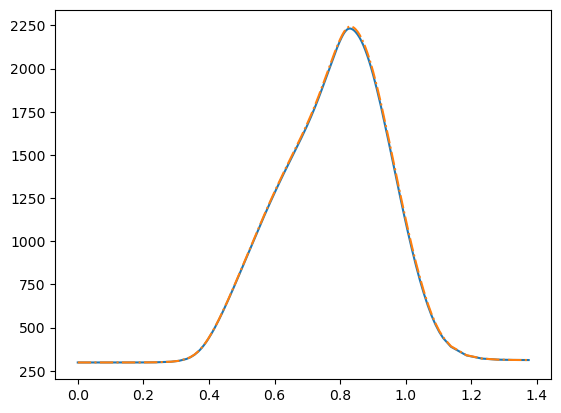

In [42]:
reconNorm_T = tableNorm_T.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].T)
plt.plot(cfdf[0].x, reconNorm_T, linestyle='-.')

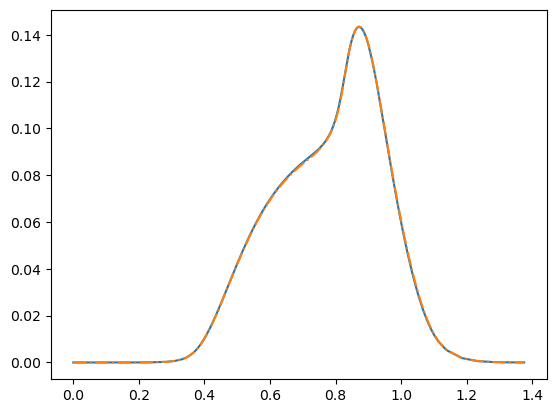

In [43]:
iCO2 = kinetics.species.index('CO2')
reconNorm_CO2 = tableNorm_CO2.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].Y[:,iCO2])
plt.plot(cfdf[0].x, reconNorm_CO2, linestyle='-.')

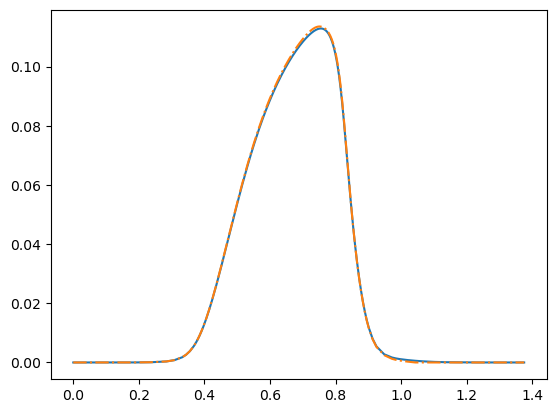

In [44]:
iCO = kinetics.species.index('CO')
reconNorm_CO = tableNorm_CO.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].Y[:,iCO])
plt.plot(cfdf[0].x, reconNorm_CO, linestyle='-.')

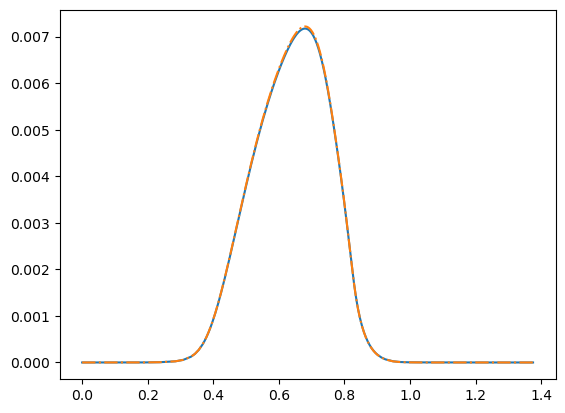

In [45]:
iH2 = kinetics.species.index('H2')
reconNorm_H2 = tableNorm_H2.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].Y[:,iH2])
plt.plot(cfdf[0].x, reconNorm_H2, linestyle='-.')

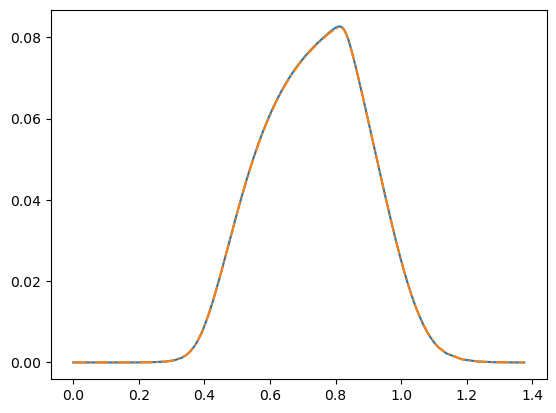

In [46]:
iH2O = kinetics.species.index('H2O')
reconNorm_H2O = tableNorm_H2O.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].Y[:,iH2O])
plt.plot(cfdf[0].x, reconNorm_H2O, linestyle='-.')

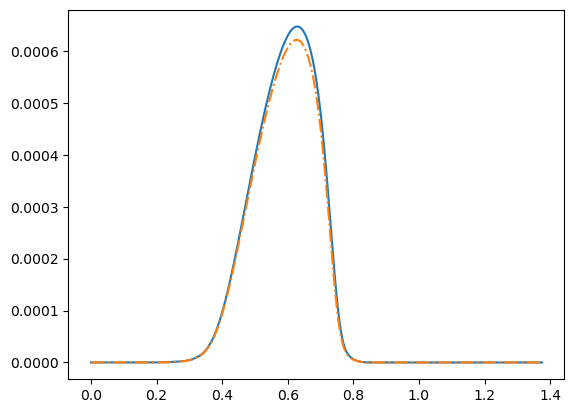

In [47]:
reconNorm_PAH12 = tableNorm_PAH12.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].pah12_Y)
plt.plot(cfdf[0].x, reconNorm_PAH12, linestyle='-.')

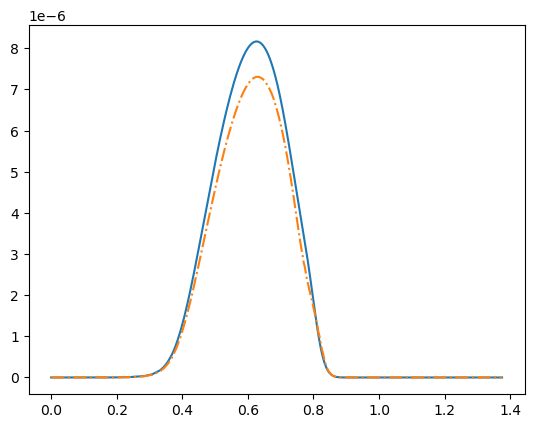

In [48]:
reconNorm_PAH34 = tableNorm_PAH34.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].pah34_Y)
plt.plot(cfdf[0].x, reconNorm_PAH34, linestyle='-.')

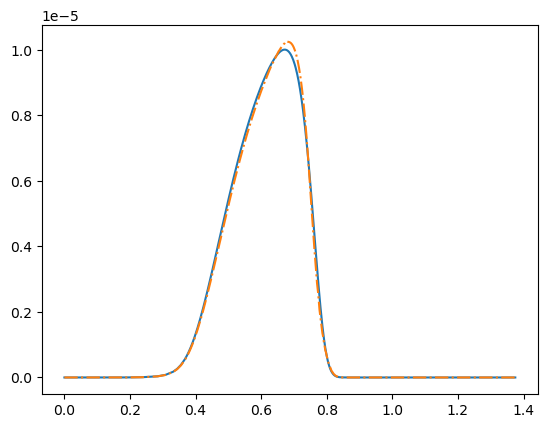

In [49]:
reconNorm_PAHLP = tableNorm_PAHLP.Reconstruct(cfdf[0].Z, cfdf[0].y)
plt.plot(cfdf[0].x, cfdf[0].pahlp_Y)
plt.plot(cfdf[0].x, reconNorm_PAHLP, linestyle='-.')

In [50]:
def ReconstructSolutions():
    
    recon_T = []
    for i in range(ncfdf):
        recon_T.append ( tableNorm_T.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_CO2 = []
    iCO2 = kinetics.species.index('CO2')
    for i in range(ncfdf):
        recon_Y_CO2.append ( tableNorm_CO2.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_CO = []
    iCO = kinetics.species.index('CO')
    for i in range(ncfdf):
        recon_Y_CO.append ( tableNorm_CO.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_H2 = []
    iH2 = kinetics.species.index('H2')
    for i in range(ncfdf):
        recon_Y_H2.append ( tableNorm_H2.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_H2O = []
    iH2O = kinetics.species.index('H2O')
    for i in range(ncfdf):
        recon_Y_H2O.append ( tableNorm_H2O.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_C2H2 = []
    iC2H2 = kinetics.species.index('C2H2')
    for i in range(ncfdf):
        recon_Y_C2H2.append ( tableNorm_C2H2.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_PAH12 = []
    for i in range(ncfdf):
        recon_Y_PAH12.append ( tableNorm_PAH12.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_PAH34 = []
    for i in range(ncfdf):
        recon_Y_PAH34.append ( tableNorm_PAH34.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    recon_Y_PAHLP = []
    for i in range(ncfdf):
        recon_Y_PAHLP.append ( tableNorm_PAHLP.Reconstruct(cfdf[i].Z, cfdf[i].y) )

    return recon_T, recon_Y_CO2, recon_Y_CO,recon_Y_H2, recon_Y_H2O, recon_Y_C2H2, recon_Y_PAH12, recon_Y_PAH34, recon_Y_PAHLP

In [51]:
recon_T, recon_Y_CO2, recon_Y_CO,recon_Y_H2, recon_Y_H2O, recon_Y_C2H2, recon_Y_PAH12, recon_Y_PAH34, recon_Y_PAHLP = ReconstructSolutions()

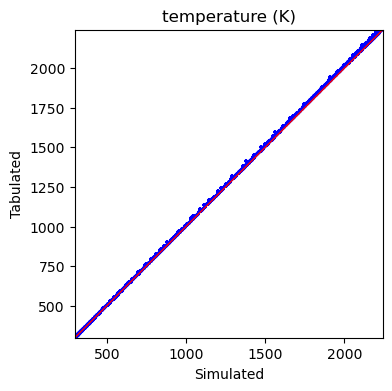

In [52]:
ScatterPlotMultipleFlames("T", recon_T, "temperature (K)", "Scatter_T")
#PlotProfile(cfdf[0].Z, cfdf[0].T, cfdf[0].Z, recon_T[0], "temperature (K)", "mixture fraction", "temperature (K)", "Profiles_T")

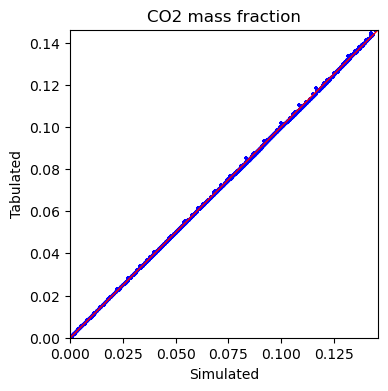

In [53]:
ScatterPlotMultipleFlames("CO2", recon_Y_CO2, "CO2 mass fraction", "Scatter_CO2")
#PlotProfile(cfdf[0].Z, cfdf[0].Y[:,kinetics.species.index('CO2')], cfdf[0].Z, recon_Y_CO2[0], "CO2 mass fraction", "mixture fraction", "CO2 mass fraction", "Profiles_CO2")

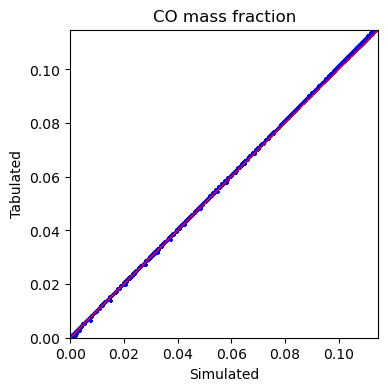

In [54]:
ScatterPlotMultipleFlames("CO", recon_Y_CO, "CO mass fraction", "Scatter_CO")
#PlotProfile(cfdf[0].Z, cfdf[0].Y[:,kinetics.species.index('CO')], cfdf[0].Z, recon_Y_CO[0], "CO mass fraction", "mixture fraction", "CO mass fraction", "Profiles_CO")

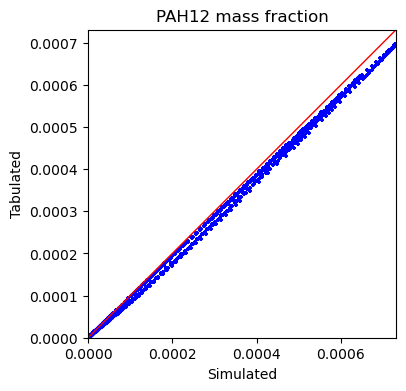

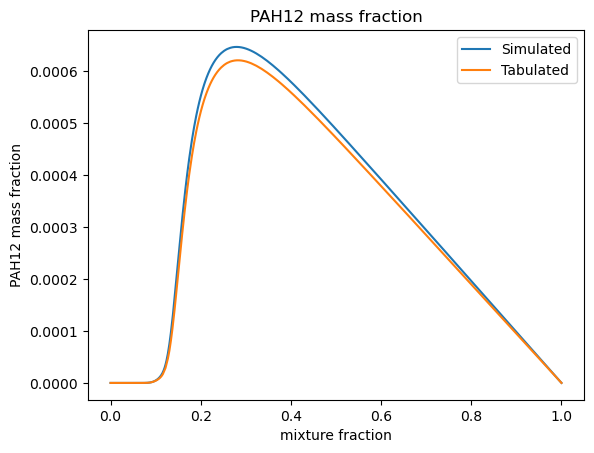

In [55]:
ScatterPlotMultipleFlames("PAH12", recon_Y_PAH12, "PAH12 mass fraction", "Scatter_PAH12")
PlotProfile(cfdf[0].Z, cfdf[0].pah12_Y, cfdf[0].Z, recon_Y_PAH12[0], "PAH12 mass fraction", "mixture fraction", "PAH12 mass fraction", "Profiles_PAH12")

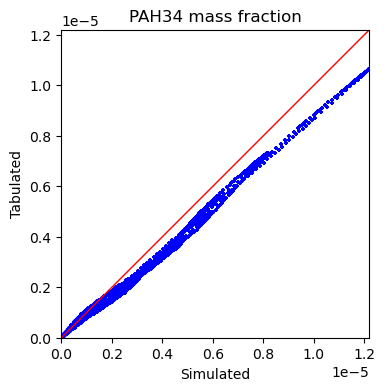

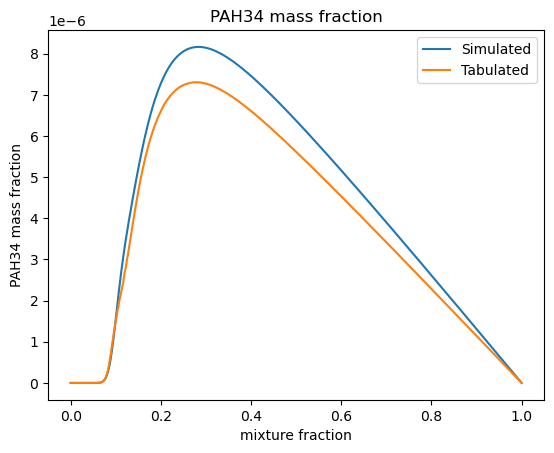

In [56]:
ScatterPlotMultipleFlames("PAH34", recon_Y_PAH34, "PAH34 mass fraction", "Scatter_PAH34")
PlotProfile(cfdf[0].Z, cfdf[0].pah34_Y, cfdf[0].Z, recon_Y_PAH34[0], "PAH34 mass fraction", "mixture fraction", "PAH34 mass fraction", "Profiles_PAH34")

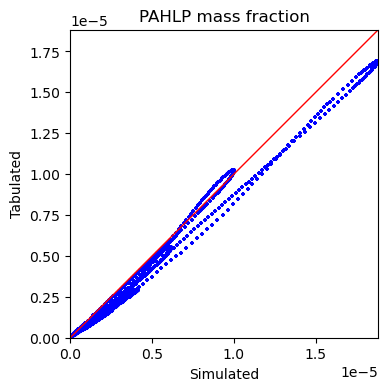

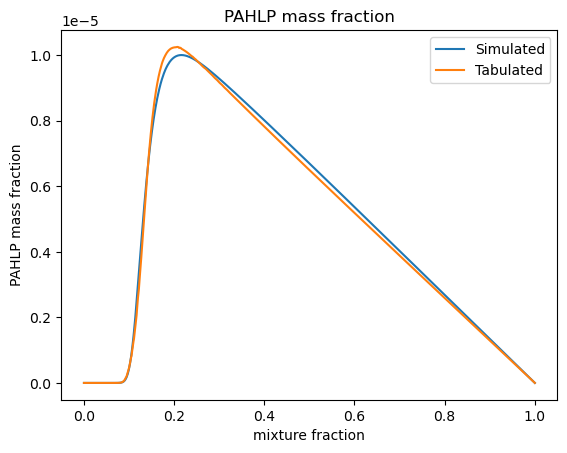

In [57]:
ScatterPlotMultipleFlames("PAHLP", recon_Y_PAHLP, "PAHLP mass fraction", "Scatter_PAHLP")
PlotProfile(cfdf[0].Z, cfdf[0].pahlp_Y, cfdf[0].Z, recon_Y_PAHLP[0], "PAHLP mass fraction", "mixture fraction", "PAHLP mass fraction", "Profiles_PAHLP")

In [58]:
nrmse_T = nrmse_total("T", recon_T)
nrmse_Y_CO2 = nrmse_total("CO2", recon_Y_CO2)
nrmse_Y_CO = nrmse_total("CO", recon_Y_CO)
nrmse_Y_H2 = nrmse_total("H2", recon_Y_H2)
nrmse_Y_H2O = nrmse_total("H2O", recon_Y_H2O)
nrmse_Y_C2H2 = nrmse_total("C2H2", recon_Y_C2H2)

print('T:', nrmse_T)
print('CO2', nrmse_Y_CO2)
print('CO', nrmse_Y_CO)
print('H2', nrmse_Y_H2)
print('H2O', nrmse_Y_H2O)
print('C2H2', nrmse_Y_C2H2)

T: [0.00723672]
CO2 [0.00607402]
CO [0.00896596]
H2 [0.00756794]
H2O [0.0022989]
C2H2 [0.00590404]


In [59]:
nrmse_Y_PAH12 = nrmse_total("PAH12", recon_Y_PAH12)
nrmse_Y_PAH34 = nrmse_total("PAH34", recon_Y_PAH34)
nrmse_Y_PAHLP = nrmse_total("PAHLP", recon_Y_PAHLP)

print('PAH12', nrmse_Y_PAH12)
print('PAH34', nrmse_Y_PAH34)
print('PAHLP', nrmse_Y_PAHLP)

PAH12 [0.07934824]
PAH34 [0.20493615]
PAHLP [0.19943233]


In [60]:
f = open(plot_folder + "summary.out", "w")
f.write('T     ' + str(nrmse_T) + '\n')
f.write('CO2   ' + str(nrmse_Y_CO2) + '\n')
f.write('CO    ' + str(nrmse_Y_CO) + '\n')
f.write('H2    ' + str(nrmse_Y_H2) + '\n')
f.write('H2O   ' + str(nrmse_Y_H2O) + '\n')
f.write('C2H2  ' + str(nrmse_Y_C2H2) + '\n')
f.write('PAH12 ' + str(nrmse_Y_PAH12) + '\n')
f.write('PAH34 ' + str(nrmse_Y_PAH34) + '\n')
f.write('PAHLP ' + str(nrmse_Y_PAHLP) + '\n')
f.close()

In [61]:
if (post_process_cfd == 1):
    
    sol = []
    with open(plot_folder + "Solution.out", 'r') as f:
        for line in f:
            y = line.split()
            sol.append(y)
    sol = sol[1:]
    sol = np.array(sol).astype(np.float)
    
    rec = []
    with open(plot_folder + "Reconstructed.out", 'r') as f:
        for line in f:
            y = line.split()
            rec.append(y)
    rec = rec[1:]
    rec = np.array(rec).astype(np.float)
    

In [62]:
if (post_process_cfd == 1):
    
    PlotScatterComparisonCFD(sol[:,0], rec[:,0], "temperature (K)", "todo")
    PlotScatterComparisonCFD(sol[:,8], rec[:,2], "CO mass fraction", "todo")
    PlotScfolder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\CFDF\\ethylene\\"
    
    cfdf = []
    sol_xml_file_name = folder_name + "035\\POLIMI_1509\\Le1\\Output.xml"
    cfdf.append( Flame1D(sol_xml_file_name, kinetics) )
    PlotScatterComparisonCFD(sol[:,3], rec[:,6], "title", "todo")
    PlotScatterComparisonCFD(sol[:,4], rec[:,7], "title", "todo")
    PlotScatterComparisonCFD(sol[:,5], rec[:,8], "title", "todo")

In [63]:
cfdf = []

folder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\CFDF\\ethylene\\"

sol_xml_file_name = folder_name + "035\\POLIMI_1509\\Le1\\Output.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )

folder_name = "C:\\Users\\acuoci\\Aachen-Data\\Simulations\\CFDF\\ethylene\\035\\POLIMI_1509\\Le1-A050-f100Hz\\"

sol_xml_file_name = folder_name + "Snapshot.0.0005.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "Snapshot.0.001.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "Snapshot.0.0015.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "Snapshot.0.002.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )
sol_xml_file_name = folder_name + "Snapshot.0.0025.xml"
cfdf.append( LaminarFlame1D(sol_xml_file_name, kinetics) )

ncfdf = len(cfdf)
for i in range(ncfdf):
    LaminarFlame1D.progress_variable(cfdf[i], kinetics, alpha)

no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file
no reaction-rates available in the xml file


In [64]:
recon_T, recon_Y_CO2, recon_Y_CO,recon_Y_H2, recon_Y_H2O, recon_Y_C2H2, recon_Y_PAH12, recon_Y_PAH34, recon_Y_PAHLP = ReconstructSolutions()

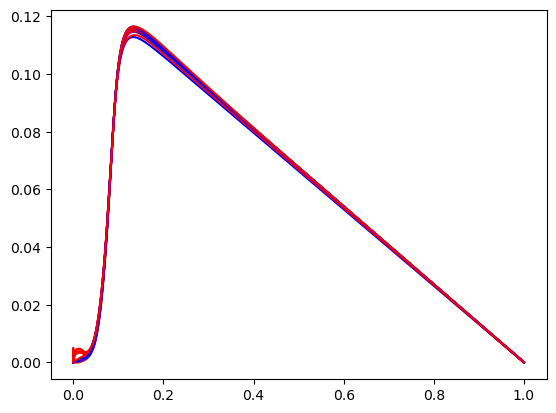

In [65]:
for i in range(ncfdf):
    plt.plot(cfdf[i].Z, cfdf[i].Y[:,kinetics.species.index('CO')], color='b')
    plt.plot(cfdf[i].Z, recon_Y_CO[i], color='r')

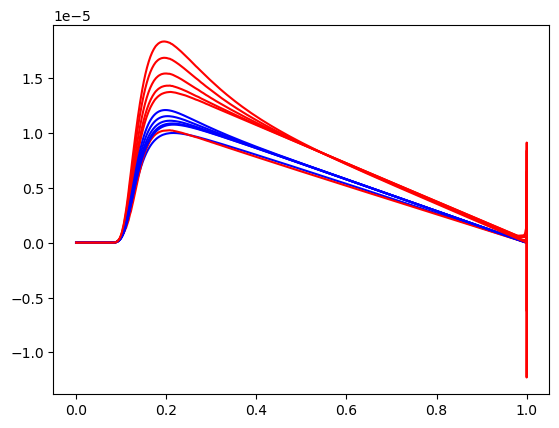

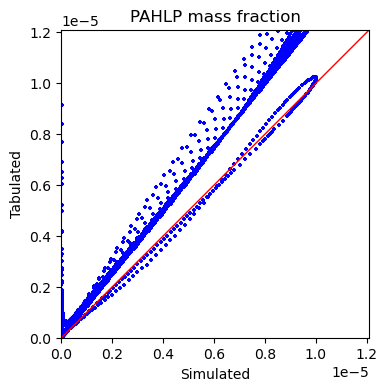

In [66]:
for i in range(ncfdf):
    plt.plot(cfdf[i].Z, cfdf[i].pahlp_Y, color='b')
    plt.plot(cfdf[i].Z, recon_Y_PAHLP[i], color='r')
#plt.xlim([0.98,1])
#plt.ylim([0, 0.75e-5])

ScatterPlotMultipleFlames("PAHLP", recon_Y_PAHLP, "PAHLP mass fraction", "Scatter_PAHLP")